In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import skimage
import ipywidgets as widgets
from scipy.interpolate import interp1d

from skimage.color import rgb2hsv, rgba2rgb, hsv2rgb, rgb2gray, gray2rgb

In [2]:
%matplotlib notebook

In [3]:
directory = '../data/faces'

In [4]:
fps = [os.path.join(directory, root) for root in os.listdir(directory)]
fp = np.random.choice(fps)
# fp = '../data/faces/th (48).jpeg'
root = fp.split('/')[-1].split('.')[0]
root

'th (8)'

<IPython.core.display.Javascript object>


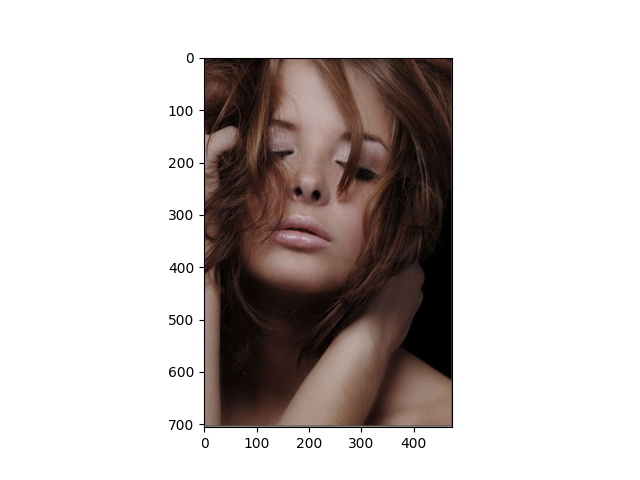

In [5]:
img = skimage.io.imread(fp)

if img.shape[2] == 4:
    img = rgba2rgb(img)
    
if np.max(img) > 1:
    img = img / 255.

hsv_img = rgb2hsv(img)
gray_img = rgb2gray(img)
plt.imshow(img)
plt.show()

In [8]:
def get_segmented(img, thresholds):
    new = np.zeros((img.shape[0], img.shape[1], 3))
    new[img <= thresholds[0]] = (0., 0., 0.)
    for i, v1 in enumerate(thresholds):
        if i < len(thresholds) - 1:
            v2 = thresholds[i+1]
            mask = (img >= v1) & (img <= v2)
            new[mask] = COLORS[i]
        else:
            mask = img >= v1
            new[mask] = (1.,1.,1.)
            
    return new

In [9]:
# def on_slider_change(event):
#     if event['name'] == 'value':
#         idx = int(event['owner'].description)
#         defaults[idx] = event['new']
#         x = get_segmented(gray_img, defaults)
#         plt.clf()
#         plt.imshow(x)
#         plt.axis('off')
THRESHOLDS = None
def on_range_slider_change(event):
    global THRESHOLDS
    if event['name'] == 'value':
        mapping = interp1d([0, 1], event['new'])
        THRESHOLDS = [mapping(val) for val in defaults]
        x = get_segmented(gray_img, THRESHOLDS)
        axs[0].imshow(x)
        axs[0].axis('off')
        plt.axis('off')

<IPython.core.display.Javascript object>


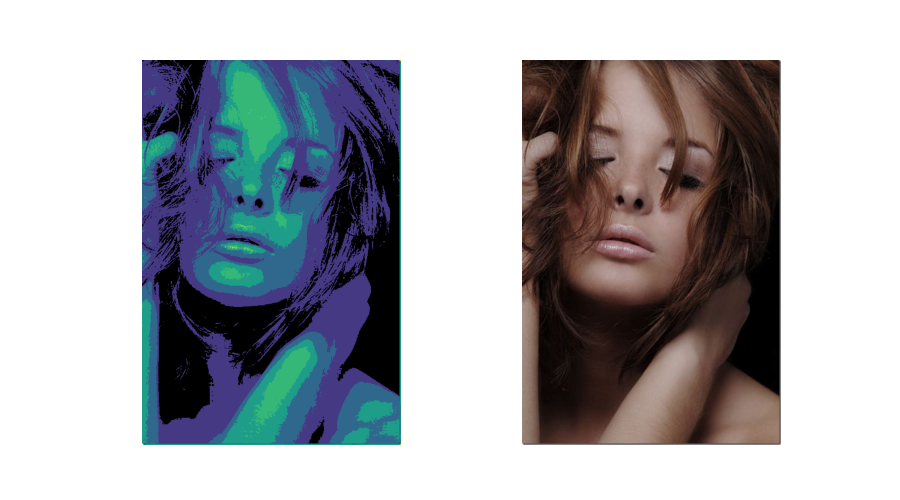

FloatRangeSlider(value=(0.0, 1.0), max=1.1, min=-0.1, step=0.01)

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(9, 5))
axs[1].imshow(img)
# defaults = [.1, .3, .5, .65, .8, .9]
defaults = [.1, .3, .5, .6, .7, .8, .90]
# COLORS = sns.color_palette('viridis', n_colors=len(defaults))
COLORS = sns.color_palette('viridis', n_colors=5)[:2] + sns.color_palette('viridis', n_colors=8)[-4:]
slider = widgets.FloatRangeSlider(value=[0, 1], min=-defaults[0], max=1 + 1-defaults[-1], step=.01, readout_format='.2f')
slider.observe(on_range_slider_change)
slider

In [11]:
segmented_img = get_segmented(gray_img, THRESHOLDS)
segmented_img.shape

(706, 474, 3)

In [12]:
# the spine
anat_ref_fp = '../data/anatomy_ref/spine/simplified_torso_angles.png'
additional_fps = [
    '../data/anatomy_ref/spine/simpliefied_torso_angles_2.png',
    '../data/anatomy_ref/spine/spine.png'
]

<IPython.core.display.Javascript object>


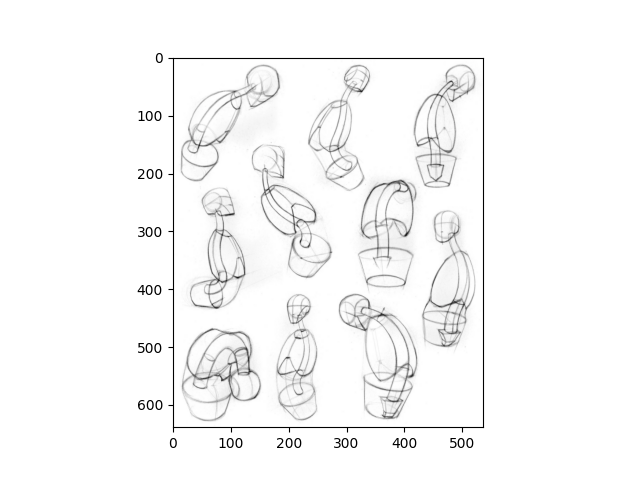

In [14]:
anat_ref_img = skimage.io.imread(anat_ref_fp)
fig, axs = plt.subplots()
plt.imshow(anat_ref_img)

<IPython.core.display.Javascript object>


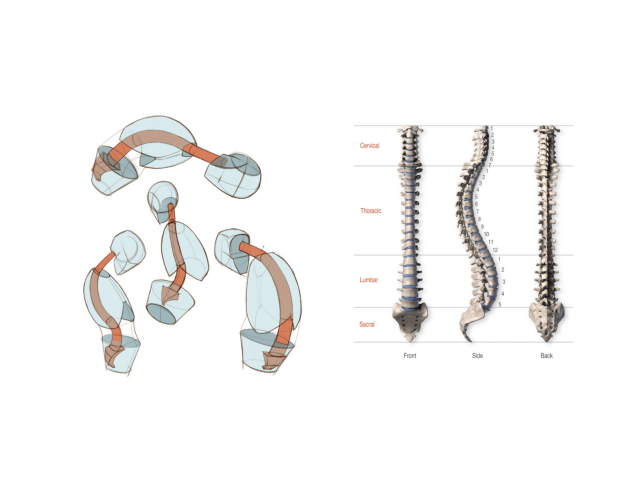

In [15]:
extras = [skimage.io.imread(fp) for fp in additional_fps]
fig, axs = plt.subplots(ncols=len(extras))
for x, ax in zip(extras, axs):
    ax.imshow(x)
    ax.axis('off')

<IPython.core.display.Javascript object>


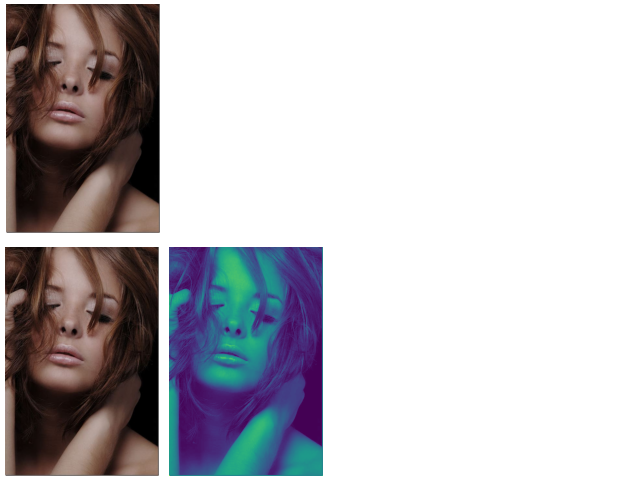

In [29]:
# make reference
layouts = [
'''
AA......
AA......
''',
'''
AABB....
AABB....
'''
]
img_mapping = {
    'A': img,
    'B': gray_img
}

fig = plt.figure(layout="constrained")
sections = fig.subfigures(nrows=len(layouts), ncols=1)
for section, layout in zip(sections, layouts):
    axd = section.subplot_mosaic(layout)
    for k, ax in axd.items():
        if k != '.':
            ax.imshow(img_mapping[k])
        ax.axis('off')
    
# axd = left.subplot_mosaic(mosaic)

# fig = plt.figure(layout="constrained")
# ax_dict = fig.subplot_mosaic(
#     layout
# )

# ax_dict['A'].imshow(img)
# ax_dict['B'].imshow(gray_img)

# for ax in ax_dict.values(): ax.axis('off')